In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr,ttest_ind, f_oneway
warnings.filterwarnings('ignore')



In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training_data_with_weather_info_week_1.csv')

In [8]:
df

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0000,65.0000,22-01-2020,0,0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0000,65.0000,23-01-2020,0,0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0000,65.0000,24-01-2020,0,0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0000,65.0000,25-01-2020,0,0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0000,65.0000,26-01-2020,0,0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,20-03-2020,2,0,80,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,0.198068,6.0,0.00,0
17888,26379,NaN,Zambia,-15.4167,28.2833,21-03-2020,2,0,81,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,0.212487,7.1,99.99,1
17889,26380,NaN,Zambia,-15.4167,28.2833,22-03-2020,3,0,82,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,0.218712,5.0,99.99,1
17890,26381,NaN,Zambia,-15.4167,28.2833,23-03-2020,3,0,83,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,0.192580,4.2,0.00,0


In [9]:
df.shape

(17892, 20)

In [10]:
df.isna().sum()

,0
Id,0
Province/State,9702
Country/Region,0
Lat,0
Long,0
Date,0
ConfirmedCases,0
Fatalities,0
day_from_jan_first,0
temp,0


In [11]:
df.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.00000,17892.000000,17755.000000,17876.000000,17892.000000,10945.000000,17274.000000,17274.000000,1.727400e+04,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737,53.00000,54.849313,45.630262,64.380191,702.306416,1016.581023,42.353630,0.665443,inf,25.521104,7.826334,0.336631
std,7624.675152,22.935092,79.923261,3538.599684,174.346267,18.18475,22.306125,22.900739,22.310919,428.769343,8.490953,22.399517,0.191092,NaN,136.295573,26.740543,0.472571
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,22.00000,-27.200000,-45.400000,-23.800000,0.000000,968.900000,-33.100000,0.053782,-2.374315e+01,0.000000,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000,37.00000,38.800000,30.200000,47.500000,20.700000,1011.300000,27.000000,0.560904,1.161556e-01,3.500000,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000,53.00000,53.900000,44.400000,64.800000,976.600000,1016.000000,40.800000,0.704800,1.932966e-01,5.600000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000,69.00000,76.800000,67.500000,84.600000,999.900000,1021.600000,63.500000,0.801220,2.329961e-01,8.700000,0.030000,1.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000,84.00000,97.300000,88.200000,109.600000,999.900000,1051.700000,81.100000,1.000000,inf,999.900000,99.990000,1.000000


In [12]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,22-01-2020,0,0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,23-01-2020,0,0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,24-01-2020,0,0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,25-01-2020,0,0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,26-01-2020,0,0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [13]:
df.tail()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
17887,26378,NaN,Zambia,-15.4167,28.2833,20-03-2020,2,0,80,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,0.198068,6.0,0.00,0
17888,26379,NaN,Zambia,-15.4167,28.2833,21-03-2020,2,0,81,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,0.212487,7.1,99.99,1
17889,26380,NaN,Zambia,-15.4167,28.2833,22-03-2020,3,0,82,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,0.218712,5.0,99.99,1
17890,26381,NaN,Zambia,-15.4167,28.2833,23-03-2020,3,0,83,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,0.192580,4.2,0.00,0
17891,26382,NaN,Zambia,-15.4167,28.2833,24-03-2020,3,0,84,72.6,60.3,84.2,999.9,NaN,62.0,0.691204,0.183033,6.4,0.00,1


In [14]:
df.isnull()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17888,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17889,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17890,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [15]:
df.columns

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities', 'day_from_jan_first', 'temp', 'min',
       'max', 'stp', 'slp', 'dewp', 'rh', 'ah', 'wdsp', 'prcp', 'fog'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17892 non-null  int64  
 1   Province/State      8190 non-null   object 
 2   Country/Region      17892 non-null  object 
 3   Lat                 17892 non-null  float64
 4   Long                17892 non-null  float64
 5   Date                17892 non-null  object 
 6   ConfirmedCases      17892 non-null  int64  
 7   Fatalities          17892 non-null  int64  
 8   day_from_jan_first  17892 non-null  int64  
 9   temp                17892 non-null  float64
 10  min                 17755 non-null  float64
 11  max                 17876 non-null  float64
 12  stp                 17892 non-null  float64
 13  slp                 10945 non-null  float64
 14  dewp                17274 non-null  float64
 15  rh                  17274 non-null  float64
 16  ah  

##1) How do confirmed cases and fatalities vary over time for different regions?


In [17]:
region_df = df.groupby(['Country/Region', 'Date'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
print(region_df)

      Country/Region        Date  ConfirmedCases  Fatalities
0        Afghanistan  01-02-2020               0           0
1        Afghanistan  01-03-2020               1           0
2        Afghanistan  02-02-2020               0           0
3        Afghanistan  02-03-2020               1           0
4        Afghanistan  03-02-2020               0           0
...              ...         ...             ...         ...
10264         Zambia  28-02-2020               0           0
10265         Zambia  29-01-2020               0           0
10266         Zambia  29-02-2020               0           0
10267         Zambia  30-01-2020               0           0
10268         Zambia  31-01-2020               0           0

[10269 rows x 4 columns]


##2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?


In [18]:
country_summary = df.groupby('Country/Region').agg(
    total_cases=('ConfirmedCases', 'sum'),
    total_fatalities=('Fatalities', 'sum')
).reset_index()

# Sort to find highest and lowest regions
highest_cases = country_summary.nlargest(5, 'total_cases')
lowest_cases = country_summary.nsmallest(5, 'total_cases')

highest_fatalities = country_summary.nlargest(5, 'total_fatalities')
lowest_fatalities = country_summary.nsmallest(5, 'total_fatalities')

# Display the results
print("\nHighest Total Confirmed Cases:")
print(highest_cases[['Country/Region', 'total_cases', 'total_fatalities']])

print("\nLowest Total Confirmed Cases:")
print(lowest_cases[['Country/Region', 'total_cases', 'total_fatalities']])

print("\nHighest Total Fatalities:")
print(highest_fatalities[['Country/Region', 'total_cases', 'total_fatalities']])

print("\nLowest Total Fatalities:")
print(lowest_fatalities[['Country/Region', 'total_cases', 'total_fatalities']])


Highest Total Confirmed Cases:
    Country/Region  total_cases  total_fatalities
29           China      3500461            121046
75           Italy       571924             46856
71            Iran       278992             16870
139          Spain       232453             12464
154             US       219412              2972

Lowest Total Confirmed Cases:
   Country/Region  total_cases  total_fatalities
7           Aruba            0                 0
25       Cameroon            0                 0
36    Cruise Ship            0                 0
39        Czechia            0                 0
51  French Guiana            0                 0

Highest Total Fatalities:
    Country/Region  total_cases  total_fatalities
29           China      3500461            121046
75           Italy       571924             46856
71            Iran       278992             16870
139          Spain       232453             12464
50          France       122701              3721

Lowest Total Fa

##3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?


Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities', 'day_from_jan_first', 'temp', 'min',
       'max', 'stp', 'slp', 'dewp', 'rh', 'ah', 'wdsp', 'prcp', 'fog'],
      dtype='object')
Correlation between Temperature and Confirmed Cases: -0.0114
Correlation between Temperature and Fatalities: -0.0050


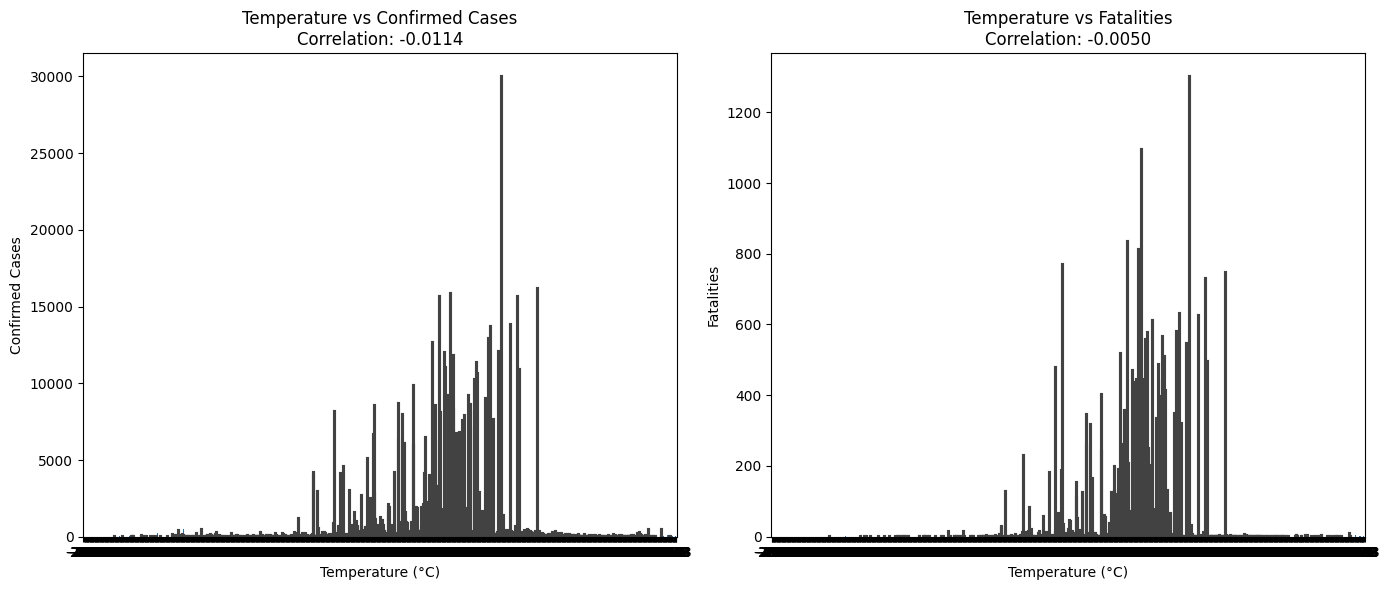

In [19]:
# Inspect the columns
print(df.columns)

# Replace with the actual column names based on your dataset
temp_col = 'temp'  # Replace with the actual temperature column name
cases_col = 'ConfirmedCases'  # Replace with the actual confirmed cases column name 'ConfirmedCases'
fatalities_col = 'Fatalities'  # Replace with the actual fatalities column name 'Fatalities'

# Drop rows with missing values
df = df[[temp_col, cases_col, fatalities_col]].dropna()

# Correlation calculation
corr_cases, _ = pearsonr(df[temp_col], df[cases_col]) # Replace data with df
corr_fatalities, _ = pearsonr(df[temp_col], df[fatalities_col]) # Replace data with df

print(f"Correlation between Temperature and Confirmed Cases: {corr_cases:.4f}")
print(f"Correlation between Temperature and Fatalities: {corr_fatalities:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature vs Confirmed Cases
sns.barplot(x=temp_col, y=cases_col, data=df, ax=axes[0]) # Replace data with df
axes[0].set_title(f'Temperature vs Confirmed Cases\nCorrelation: {corr_cases:.4f}')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Confirmed Cases')

# Temperature vs Fatalities
sns.barplot(x=temp_col, y=fatalities_col, data=df, ax=axes[1]) # Replace data with df
axes[1].set_title(f'Temperature vs Fatalities\nCorrelation: {corr_fatalities:.4f}')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Fatalities')

plt.tight_layout()
plt.show()